In [3]:
import numpy as np 
from sklearn import tree
from sklearn import preprocessing

In [4]:
# Part 1 a)

In [5]:
import pandas as pd

pathPenguins =  input("Enter path to abaguins.csv file: ")
penguins = pd.read_csv(pathPenguins)

print(penguins.columns)

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [6]:
# i. convert island and sex into 1-hot vectors
penguin_one_hot_vector = pd.get_dummies(penguins, columns = ['island', 'sex'])

# get names of columns generated by get_dummies
print(penguin_one_hot_vector.columns)

Index(['species', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen',
       'sex_FEMALE', 'sex_MALE'],
      dtype='object')


In [7]:
# convert to 0s and 1s where False == 0 and True == 1
penguin_one_hot_vector["island_Biscoe"] = penguin_one_hot_vector["island_Biscoe"].astype(int)
penguin_one_hot_vector["island_Dream"] = penguin_one_hot_vector["island_Dream"].astype(int)
penguin_one_hot_vector["island_Torgersen"] = penguin_one_hot_vector["island_Torgersen"].astype(int)

penguin_one_hot_vector["sex_FEMALE"] = penguin_one_hot_vector["sex_FEMALE"].astype(int)
penguin_one_hot_vector["sex_MALE"] = penguin_one_hot_vector["sex_MALE"].astype(int)

print(penguin_one_hot_vector)

    species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie              39.1             18.7                181   
1    Adelie              39.5             17.4                186   
2    Adelie              40.3             18.0                195   
3    Adelie              36.7             19.3                193   
4    Adelie              39.3             20.6                190   
..      ...               ...              ...                ...   
328  Gentoo              47.2             13.7                214   
329  Gentoo              46.8             14.3                215   
330  Gentoo              50.4             15.7                222   
331  Gentoo              45.2             14.8                212   
332  Gentoo              49.9             16.1                213   

     body_mass_g  island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  \
0           3750              0             0                 1           0   
1           3

In [8]:
# ii. convert island and sex into features ourselves
penguins_manual_categories = penguins
penguins_manual_categories['Biscoe'] = penguins_manual_categories['island']
penguins_manual_categories['Dream'] = penguins_manual_categories['island']
penguins_manual_categories['Torgersen'] = penguins_manual_categories['island']
penguins_manual_categories['Female'] = penguins_manual_categories['sex']
penguins_manual_categories['Male'] = penguins_manual_categories['sex']

penguins_manual_categories['Biscoe'].replace('Biscoe', 1, inplace=True)
penguins_manual_categories.loc[penguins_manual_categories['Biscoe'] != 1, 'Biscoe'] = 0

penguins_manual_categories['Dream'].replace('Dream', 1, inplace=True)
penguins_manual_categories.loc[penguins_manual_categories['Dream'] != 1, 'Dream'] = 0

penguins_manual_categories['Torgersen'].replace('Torgersen', 1, inplace=True)
penguins_manual_categories.loc[penguins_manual_categories['Torgersen'] != 1, 'Torgersen'] = 0

penguins_manual_categories['Female'].replace('FEMALE', 1, inplace=True)
penguins_manual_categories.loc[penguins_manual_categories['Female'] != 1, 'Female'] = 0

penguins_manual_categories['Male'].replace('MALE', 1, inplace=True)
penguins_manual_categories.loc[penguins_manual_categories['Male'] != 1, 'Male'] = 0


print(penguins_manual_categories)
            


    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7                181   
1    Adelie  Torgersen              39.5             17.4                186   
2    Adelie  Torgersen              40.3             18.0                195   
3    Adelie  Torgersen              36.7             19.3                193   
4    Adelie  Torgersen              39.3             20.6                190   
..      ...        ...               ...              ...                ...   
328  Gentoo     Biscoe              47.2             13.7                214   
329  Gentoo     Biscoe              46.8             14.3                215   
330  Gentoo     Biscoe              50.4             15.7                222   
331  Gentoo     Biscoe              45.2             14.8                212   
332  Gentoo     Biscoe              49.9             16.1                213   

     body_mass_g     sex Biscoe Dream T

In [9]:
#Part 1 b)

In [10]:
pathAbalone =  input("Enter path to abalone.csv file: ")
abalone = pd.read_csv(pathAbalone)

print(abalone)

     Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0       F         0.605     0.470   0.165       1.1775         0.6110   
1       M         0.550     0.425   0.150       0.8315         0.4110   
2       M         0.460     0.345   0.110       0.4595         0.2350   
3       F         0.650     0.475   0.165       1.3875         0.5800   
4       M         0.575     0.470   0.140       0.8375         0.3485   
...   ...           ...       ...     ...          ...            ...   
4172    F         0.570     0.450   0.150       0.9645         0.5310   
4173    F         0.645     0.535   0.190       1.2395         0.4680   
4174    M         0.695     0.550   0.195       1.6645         0.7270   
4175    F         0.585     0.475   0.165       1.0530         0.4580   
4176    F         0.565     0.450   0.165       0.8870         0.3700   

      VisceraWeight  ShellWeight  Rings  
0            0.2275       0.2920      9  
1            0.1765       0.2165     10

In [11]:
# abalone dataset can be used as is since the features are already in numerical format

In [12]:
# Part 2

In [13]:
penguins_array = penguin_one_hot_vector.to_numpy()
abalone_array = abalone.to_numpy()

print(penguins_array)
print('\n')
print(abalone_array)




[['Adelie' 39.1 18.7 ... 1 0 1]
 ['Adelie' 39.5 17.4 ... 1 1 0]
 ['Adelie' 40.3 18.0 ... 1 1 0]
 ...
 ['Gentoo' 50.4 15.7 ... 0 0 1]
 ['Gentoo' 45.2 14.8 ... 0 1 0]
 ['Gentoo' 49.9 16.1 ... 0 0 1]]


[['F' 0.605 0.47 ... 0.2275 0.292 9]
 ['M' 0.55 0.425 ... 0.1765 0.2165 10]
 ['M' 0.46 0.345 ... 0.0885 0.1159999999999999 7]
 ...
 ['M' 0.695 0.55 ... 0.36 0.445 11]
 ['F' 0.585 0.475 ... 0.217 0.3 11]
 ['F' 0.565 0.45 ... 0.239 0.249 11]]


In [25]:
#part 3

X_pen = penguins_array[:, 0]  
Y_pen= penguins_array[:, 1:7]



X_aba = abalone_array[:, 0]  
Y_aba = abalone_array[:, 1:9]


#le = preprocessing.LabelEncoder()
#for feature in [0]:
#    X_pen[:,feature] = le.fit_transform(X_pen[:,feature])
#X_pen

print(X_pen)
print('\n')
print(Y_pen)

print(X_aba)
print('\n')
print(Y_aba)



['Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adel

[Text(0.5092731847473062, 0.9857142857142858, 'x[3] <= 0.81\nentropy = 1.582\nsamples = 3341\nvalue = [1065, 1060, 1216]'),
 Text(0.23982744558638389, 0.9571428571428572, 'x[7] <= 8.5\nentropy = 1.414\nsamples = 1688\nvalue = [317, 958, 413]'),
 Text(0.11566593126573697, 0.9285714285714286, 'x[6] <= 0.126\nentropy = 1.076\nsamples = 983\nvalue = [88, 724, 171]'),
 Text(0.05390594736587256, 0.9, 'x[3] <= 0.139\nentropy = 0.767\nsamples = 652\nvalue = [28, 548, 76]'),
 Text(0.023242300987797792, 0.8714285714285714, 'x[7] <= 6.5\nentropy = 0.629\nsamples = 187\nvalue = [1, 160, 26]'),
 Text(0.015494867325198529, 0.8428571428571429, 'x[4] <= 0.047\nentropy = 0.542\nsamples = 160\nvalue = [1, 142, 17]'),
 Text(0.014255277939182645, 0.8142857142857143, 'x[0] <= 0.257\nentropy = 0.636\nsamples = 126\nvalue = [1, 108, 17]'),
 Text(0.010536509781135, 0.7857142857142857, 'x[5] <= 0.014\nentropy = 0.496\nsamples = 92\nvalue = [0, 82, 10]'),
 Text(0.009296920395119116, 0.7571428571428571, 'x[6] <=

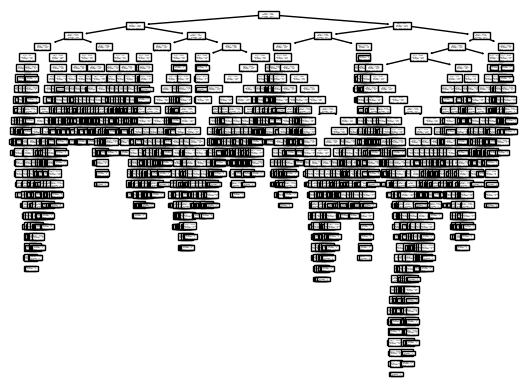

In [27]:
from sklearn.model_selection import train_test_split
X_pen_train, X_pen_test, y_pen_train, y_pen_test = train_test_split(Y_pen, X_pen, test_size=0.2, random_state=0) #split Dataset of penguin
X_aba_train, X_aba_test, y_aba_train, y_aba_test = train_test_split(Y_aba, X_aba, test_size=0.2, random_state=0) # split dataset of abalone

#print decision tree of penguin dataset
dtc = tree.DecisionTreeClassifier(criterion="entropy") 
dtc.fit(X_pen_train, y_pen_train) 
tree.plot_tree(dtc) 

#print decision tree of abalone dataset
dtc = tree.DecisionTreeClassifier(criterion="entropy") 
dtc.fit(X_aba_train, y_aba_train) 
tree.plot_tree(dtc) 



In [28]:
# evaluate classifier
y_pred = dtc.predict(X_pen_test)
from sklearn.metrics import classification_report
print(classification_report(y_pen_test, y_pred))

# show confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_pen_test, y_pred))

ValueError: X has 6 features, but DecisionTreeClassifier is expecting 8 features as input.